<a href="https://colab.research.google.com/github/nberry5/DCS-210/blob/main/Berry_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("devtools")

In [ ]:
devtools::install_github("rstudio-education/dsbox")

In [6]:
library(tidyverse)

In [7]:
library(dsbox)

In [66]:
install.packages("ggridges")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [67]:
library(ggridges)

In [11]:
# Question 1
nrow(edibnb)

[1] 13245

In [ ]:
# Question 2
View(edibnb)
# Each row is an AirBnB listing in Edinburgh.

Warning message:
“Removed 199 rows containing non-finite values (stat_bin).”


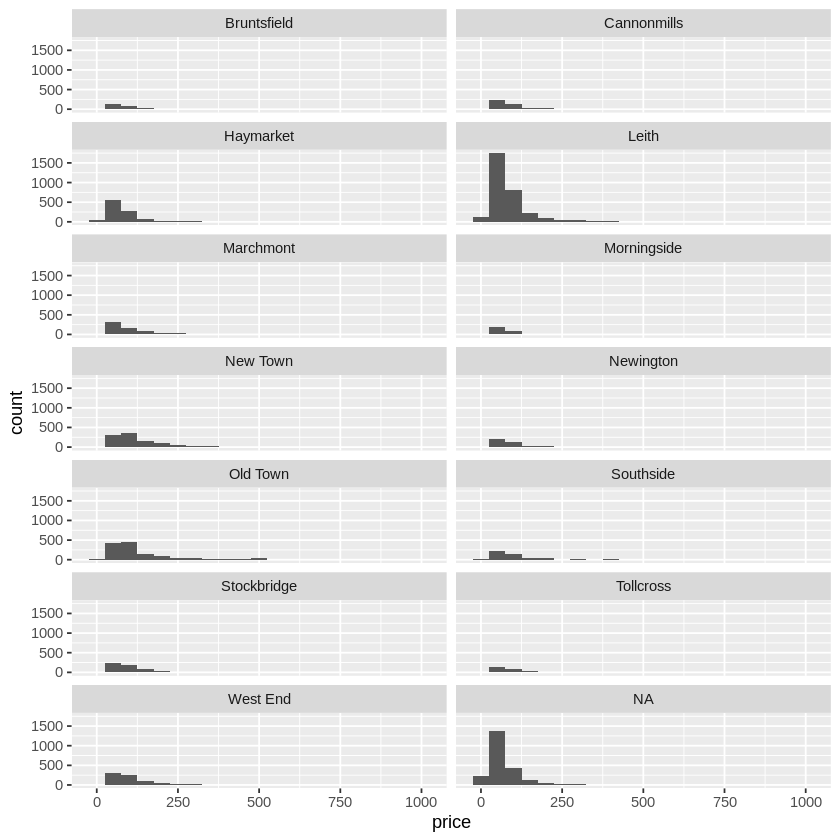

In [30]:
# Question 3
ggplot(edibnb, aes(x = price)) +
  geom_histogram(binwidth = 50) +
  facet_wrap(~ neighbourhood, ncol = 2)

# I chose to wrap it with 2 columns. There are 14 neighbourhoods, so either 1,
# 2, 7, or 14 would make them nice and even. Price seems more important to 
# compare than frequency, so lining them up in a column would be ideal. 1 single
# column made the y-axis completely squished, so 2 columns was the best option.

# **Question** **4**:

In [44]:
top_five_nb_hoods <- edibnb %>%
  group_by(neighbourhood) %>%
  summarize(
    med_price = median(price, na.rm=TRUE)
    )

In [ ]:
top_five_nb_hoods

# New Town, West End, Old Town, Stockbridge, Bruntsfield

In [ ]:
nb_hood_plot <- edibnb %>%
  select(price, neighbourhood) %>%
  filter(neighbourhood == "New Town"|neighbourhood == "West End"|
  neighbourhood == "Old Town"|neighbourhood == "Stockbridge"| neighbourhood ==
  "Bruntsfield"
  )

nb_hood_plot

Picking joint bandwidth of 13.8

Warning message:
“Removed 104 rows containing non-finite values (stat_density_ridges).”


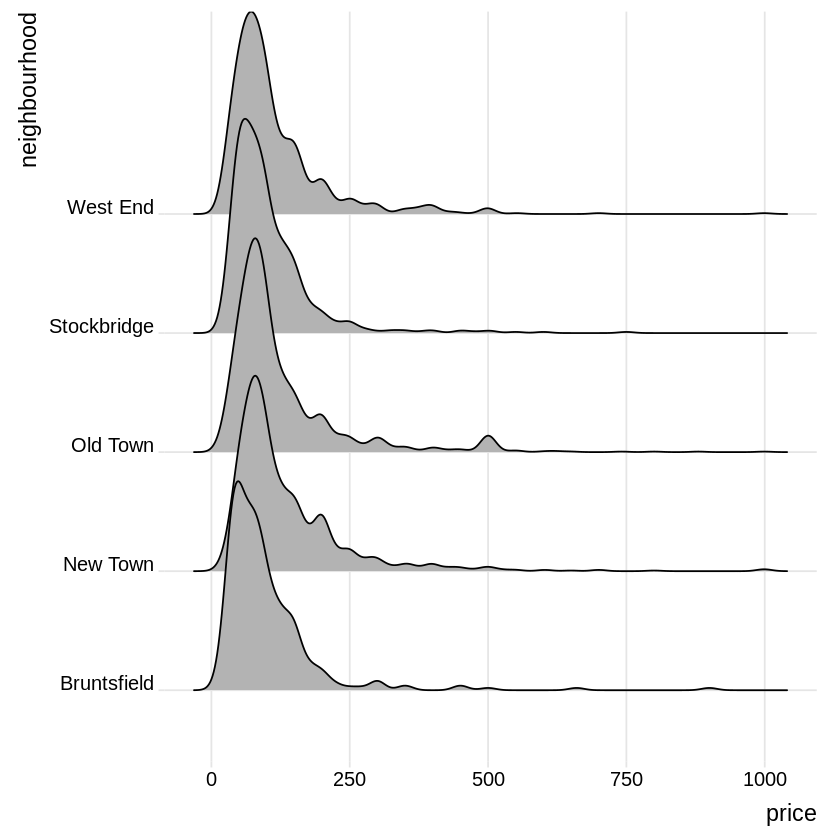

In [70]:
ggplot(nb_hood_plot, aes(x = price, y = neighbourhood)) +
  geom_density_ridges() +
  theme_ridges() +
  theme(legend.position = "none")

In [74]:
nb_hood_plot %>%
  group_by(neighbourhood) %>%
  summarise(
    min_price = min(price, na.rm=TRUE),
    mean_price = mean(price, na.rm=TRUE),
    median_price = median(price, na.rm=TRUE),
    iqr_price = IQR(price, na.rm=TRUE),
    sd_price = sd(price, na.rm=TRUE),
    max_price = max(price, na.rm=TRUE)
    )

neighbourhood,min_price,mean_price,median_price,iqr_price,sd_price,max_price
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bruntsfield,10,99.43554,80,72.5,90.17486,900
New Town,12,135.63567,100,86.5,108.58782,999
Old Town,15,127.52035,90,76.0,109.56948,999
Stockbridge,21,103.52749,85,66.0,77.56500,750
West End,19,115.69261,90,80.0,93.31377,999


# **Question 5:**

Picking joint bandwidth of 1.23

Warning message:
“Removed 1729 rows containing non-finite values (stat_density_ridges).”


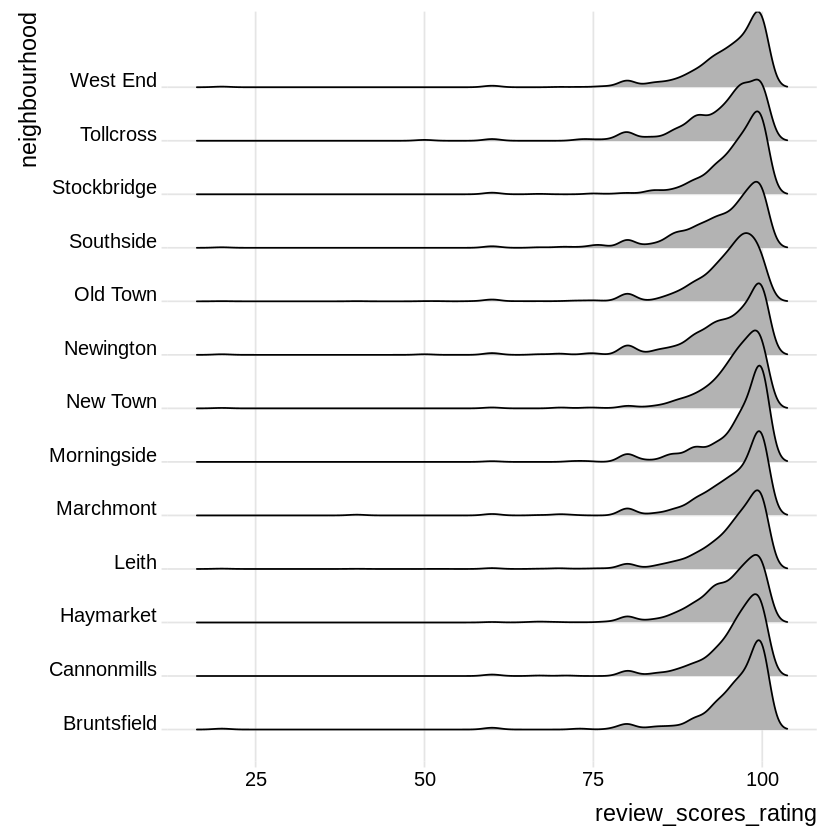

In [79]:
review_plot <- edibnb %>%
  filter(neighbourhood != "NA")

ggplot(review_plot, aes(x = review_scores_rating, y = neighbourhood)) +
  geom_density_ridges() +
  theme_ridges() +
  theme(legend.position = "none")

# They are generally rated highly, with almost all ratings exceeding 75/100.
# That being said, there is some variation between neighborhoods. For example,
# Morningside appears to have a strong proportion of ratings near 100, while
# Tollcross and Haymarket appear to be a bit flatter.